In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

<Figure size 640x480 with 0 Axes>

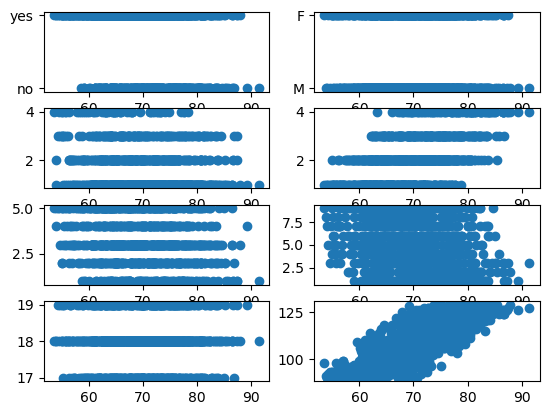

In [12]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
# print(x_train)
def feature_changing(x_train):

  # ---------
  label_encoder = LabelEncoder()
  x_train[:,0]=label_encoder.fit_transform(x_train[:,0])
  x_train[:,1]=label_encoder.fit_transform(x_train[:,1])
  # x_train['age']=label_encoder.fit_transform(x_train['age'])
  # x_train = np.array(data.iloc[:,0:8])
  
    # Your code here

  # ---------
  return x_train

plt.tight_layout()
plt.show()

for i in range (8):
    plt.subplot(4,2,i+1)
    plt.scatter(y_train,x_train[:,i])
x_train = feature_changing(x_train)
# print(x_train)

# print(x_train[:,0])

In [13]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here    
    # Your code here
  # ---------
    x_mean=np.mean(x_train,axis=0)
    x_std=np.std(x_train,axis=0)
    x_train=(x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [14]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    y_pred=np.dot(x_train,w) + b
    # print(y_pred)
    loss=np.mean((y_train-y_pred)**2)
    # return cost
  # ---------

    return loss

In [15]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
  
    # Choose learning rate yourself
  # ---------
    lr=0.0001
    y_pred = np.dot(x_train, w) +b
    gradient = -2 * np.dot(x_train.T, (y_train - y_pred)) / len(y_train)
    db = -2 * np.sum(y_train - y_pred) / len(y_train)
    w -= lr * gradient
    b-=lr*db
    


    return w,b

In [16]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
# print(w)

b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  # print(old_cost)
  w,b = gradient_descent(x_train,y_train,w,b)

# print(w,b)
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  # print(y_predict[dim],ans[dim])
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
